In [102]:
!pip install tqdm -q

In [103]:
import os
from tqdm import tqdm

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point, Polygon

In [3]:
shapefile = 'data/M2/dis_sampa_23s.shp'

In [4]:
dis_sampa = gpd.read_file(shapefile)
type(dis_sampa)

geopandas.geodataframe.GeoDataFrame

In [9]:
dis_sampa.head()

,ds_codigo,ds_nome,sp_codigo,sp_nome,area_km2,geometry
0,51,MANDAQUI,05,SANTANA-TUCURUVI,13.246426,"POLYGON ((330995.449 7407882.882, 330997.253 7..."
1,52,MARSILAC,20,PARELHEIROS,208.184737,"POLYGON ((336169.148 7355348.052, 336166.813 7..."
2,32,MOEMA,12,VILA MARIANA,9.078676,"POLYGON ((331287.247 7392208.050, 331289.654 7..."
3,57,PARQUE DO CARMO,27,ITAQUERA,15.451409,"POLYGON ((352642.665 7390165.168, 352633.278 7..."
4,60,PERDIZES,08,LAPA,6.337240,"POLYGON ((330226.820 7396102.561, 330220.609 7..."


In [8]:
dis_sampa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ds_codigo  96 non-null     object  
 1   ds_nome    96 non-null     object  
 2   sp_codigo  96 non-null     object  
 3   sp_nome    96 non-null     object  
 4   area_km2   96 non-null     float64 
 5   geometry   96 non-null     geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 4.6+ KB


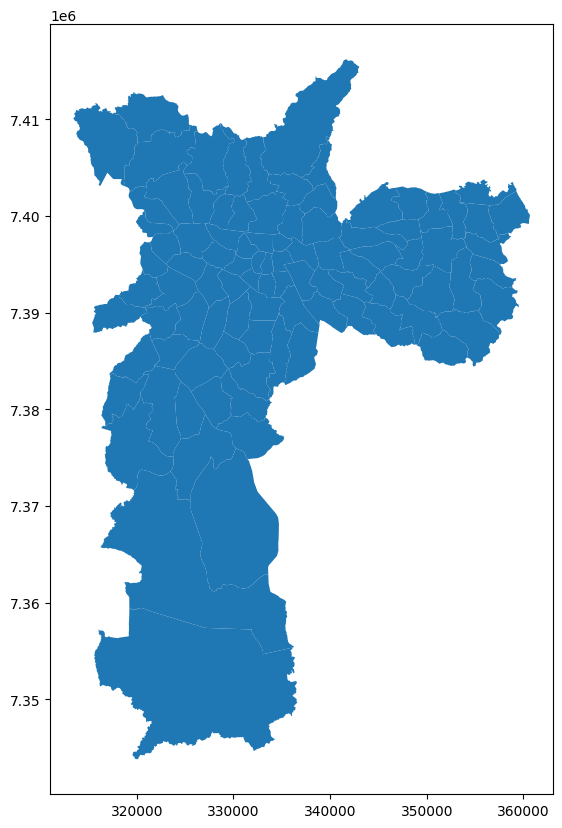

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

dis_sampa.plot(ax=ax);

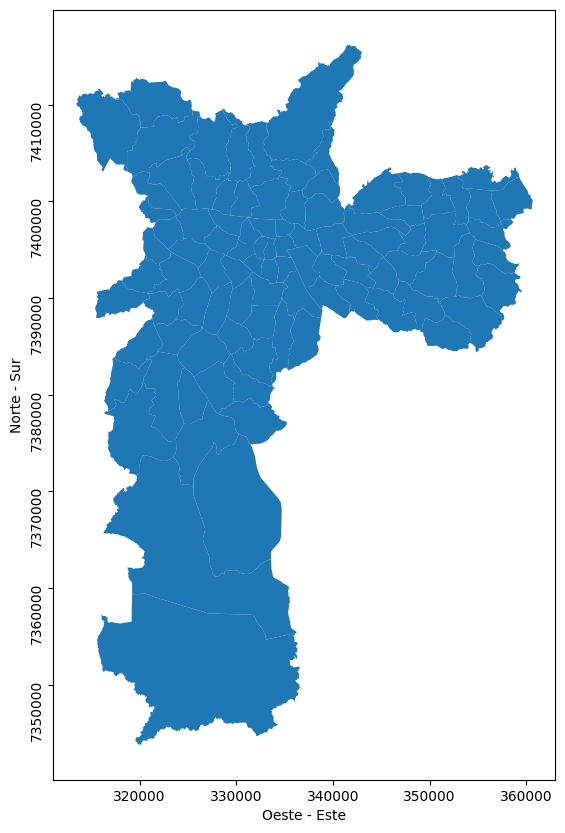

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

dis_sampa.plot(ax=ax)

ax.set_ylabel('Norte - Sur')
ax.set_xlabel('Oeste - Este')

ax.ticklabel_format(style='plain')

plt.yticks(rotation=90)
plt.show()

# Seleccionar Geometrias

In [17]:
moema = dis_sampa[dis_sampa['ds_nome'] == 'MOEMA']
moema.head()

,ds_codigo,ds_nome,sp_codigo,sp_nome,area_km2,geometry
2,32,MOEMA,12,VILA MARIANA,9.078676,"POLYGON ((331287.247 7392208.050, 331289.654 7..."


In [18]:
out = 'output/moema.shp'

moema.to_file(out)

In [19]:
dis_sampa['geometry'].head()

0    POLYGON ((330995.449 7407882.882, 330997.253 7...
1    POLYGON ((336169.148 7355348.052, 336166.813 7...
2    POLYGON ((331287.247 7392208.050, 331289.654 7...
3    POLYGON ((352642.665 7390165.168, 352633.278 7...
4    POLYGON ((330226.820 7396102.561, 330220.609 7...
Name: geometry, dtype: geometry

In [24]:
for index, row in dis_sampa[:5].iterrows():
    plg_area = row['geometry'].area
    
    print('área de {0} es {1:.2f} '.format(row['ds_nome'], plg_area))

área de MANDAQUI es 13246425.63 
área de MARSILAC es 208184736.92 
área de MOEMA es 9078676.33 
área de PARQUE DO CARMO es 15451408.61 
área de PERDIZES es 6337239.72 


In [23]:
dis_sampa['area_km2'] = dis_sampa.area/10**6
dis_sampa.head()

,ds_codigo,ds_nome,sp_codigo,sp_nome,area_km2,geometry
0,51,MANDAQUI,05,SANTANA-TUCURUVI,13.246426,"POLYGON ((330995.449 7407882.882, 330997.253 7..."
1,52,MARSILAC,20,PARELHEIROS,208.184737,"POLYGON ((336169.148 7355348.052, 336166.813 7..."
2,32,MOEMA,12,VILA MARIANA,9.078676,"POLYGON ((331287.247 7392208.050, 331289.654 7..."
3,57,PARQUE DO CARMO,27,ITAQUERA,15.451409,"POLYGON ((352642.665 7390165.168, 352633.278 7..."
4,60,PERDIZES,08,LAPA,6.337240,"POLYGON ((330226.820 7396102.561, 330220.609 7..."


In [25]:
for index, row in dis_sampa[:5].iterrows():
    
    print('área de {0} es {1:.2f} '.format(row['ds_nome'], row['area_km2']))

área de MANDAQUI es 13.25 
área de MARSILAC es 208.18 
área de MOEMA es 9.08 
área de PARQUE DO CARMO es 15.45 
área de PERDIZES es 6.34 


In [27]:
max_area = dis_sampa['area_km2'].max()
min_area = dis_sampa['area_km2'].min()
avg_area = dis_sampa['area_km2'].mean()

print(round(max_area,2), round(min_area,2), round(avg_area,2))

208.18 2.19 15.91


# Creando Geometrias

In [41]:
new_data = gpd.GeoDataFrame()

new_data

""


In [47]:
new_data['geometry'] = None

new_data

,geometry


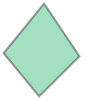

In [49]:
coordenadas = [(-23.5615974,-46.6573198), (-23.5626145,-46.6583302), (-23.5635077,-46.6572431), (-23.5635077,-46.6572431), (-23.5635077,-46.6572431), (-23.5624905,-46.6559936)]

trianon_plg = Polygon(coordenadas)
trianon_plg

In [50]:
print(trianon_plg)

POLYGON ((-23.5615974 -46.6573198, -23.5626145 -46.6583302, -23.5635077 -46.6572431, -23.5635077 -46.6572431, -23.5635077 -46.6572431, -23.5624905 -46.6559936, -23.5615974 -46.6573198))


In [51]:
new_data.loc[0, 'geometry'] = trianon_plg
new_data

,geometry
0,"POLYGON ((-23.56160 -46.65732, -23.56261 -46.6..."


In [52]:
new_data.loc[0, 'lugar'] = 'Trianon'
new_data

,geometry,lugar
0,"POLYGON ((-23.56160 -46.65732, -23.56261 -46.6...",Trianon


# CRS: Coordinate Reference System

EPSG es un sistema de coordenadas Mercator, bastante comun que permite aproximar a una esfera

In [53]:
print(new_data.crs)

None


In [59]:
new_data = new_data.set_crs('epsg:3857')
new_data

,geometry,lugar
0,"POLYGON ((-23.562 -46.657, -23.563 -46.658, -2...",Trianon


In [60]:
print(new_data.crs)

epsg:3857


In [61]:
new_data.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
out_shapefile = 'output/trianon_mercator.shp'

new_data.to_file(out_shapefile)

# Formato de Sistemas de Coordenadas

In [63]:
shapefile = 'data/a__031_001_americaDoSul.shp'

In [65]:
brasil = gpd.read_file(shapefile)
brasil.head()

,fid,ScaleRank,LabelRank,FeatureCla,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,...,TERR_,NAME_SORT,MAP_COLOR,POP_EST,GDP_MD_EST,FIPS_10_,ISO_A2,ISO_A3,ISO_N3,geometry
0,1,1.0,2.0,Adm-0 country,Argentina,ARG,0.0,2.0,Sovereign country,Argentina,...,None,Argentina,13.0,40913584.0,573900.0,0.0,AR,ARG,32.0,"MULTIPOLYGON (((-68.56752 -54.87835, -68.58653..."
1,2,1.0,2.0,Adm-0 country,Bolivia,BOL,0.0,2.0,Sovereign country,Bolivia,...,None,Bolivia,3.0,9775246.0,43270.0,0.0,BO,BOL,68.0,"POLYGON ((-60.24640 -15.47828, -60.23797 -15.5..."
2,3,1.0,2.0,Adm-0 country,Brazil,BRA,0.0,2.0,Sovereign country,Brazil,...,None,Brazil,7.0,198739269.0,1993000.0,0.0,BR,BRA,76.0,"MULTIPOLYGON (((-48.54186 -27.81670, -48.55117..."
3,4,1.0,2.0,Adm-0 country,Chile,CHL,0.0,2.0,Sovereign country,Chile,...,None,Chile,9.0,16601707.0,244500.0,0.0,CL,CHL,152.0,"MULTIPOLYGON (((-67.49094 -55.83303, -67.52205..."
4,5,1.0,2.0,Adm-0 country,Colombia,COL,0.0,2.0,Sovereign country,Colombia,...,None,Colombia,1.0,45644023.0,395400.0,0.0,CO,COL,170.0,"MULTIPOLYGON (((-78.10657 2.51230, -78.13370 2..."


In [66]:
brasil.crs

<Bound CRS: GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_ ...>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from SIRGAS 2000 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: SIRGAS 2000

In [67]:
brasil['geometry'].head()

0    MULTIPOLYGON (((-68.56752 -54.87835, -68.58653...
1    POLYGON ((-60.24640 -15.47828, -60.23797 -15.5...
2    MULTIPOLYGON (((-48.54186 -27.81670, -48.55117...
3    MULTIPOLYGON (((-67.49094 -55.83303, -67.52205...
4    MULTIPOLYGON (((-78.10657 2.51230, -78.13370 2...
Name: geometry, dtype: geometry

In [70]:
bra_wgs84 = brasil.to_crs(epsg=3395)
bra_wgs84.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [71]:
bra_wgs84['geometry'].head()

0    MULTIPOLYGON (((-7632900.902 -7303316.834, -76...
1    POLYGON ((-6706598.061 -1732985.779, -6705660....
2    MULTIPOLYGON (((-5403655.625 -3205948.989, -54...
3    MULTIPOLYGON (((-7513057.108 -7489864.851, -75...
4    MULTIPOLYGON (((-8694783.757 277886.287, -8697...
Name: geometry, dtype: geometry

In [72]:
bra_albers = brasil.to_crs(crs='esri:102033')
bra_albers.crs

<Projected CRS: ESRI:102033>
Name: South_America_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: South America
- bounds: (-90.0, -60.0, -30.0, 15.0)
Coordinate Operation:
- name: South_America_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: South American Datum 1969
- Ellipsoid: GRS 1967 Modified
- Prime Meridian: Greenwich

In [73]:
bra_albers['geometry'].head()

0    MULTIPOLYGON (((-633098.193 -2505557.779, -634...
1    POLYGON ((-25349.139 1922291.478, -24476.537 1...
2    MULTIPOLYGON (((1071381.054 446268.182, 107048...
3    MULTIPOLYGON (((-549076.510 -2592766.934, -551...
4    MULTIPOLYGON (((-2100204.193 3795190.587, -210...
Name: geometry, dtype: geometry

In [74]:
from pyproj import CRS

Texto extraido de [aqui](https://github.com/OSGeo/spatialreference.org/blob/master/scripts/sr-org.json)

In [76]:
sc = CRS('PROJCS[\"Brazil / Albers Equal Area Conic (WGS84)\",GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"degree\",0.01745329251994328,AUTHORITY[\"EPSG\",\"9122\"]],AUTHORITY[\"EPSG\",\"4326\"]],PROJECTION[\"Albers_Conic_Equal_Area\"],PARAMETER[\"longitude_of_center\",-50.0],PARAMETER[\"standard_parallel_1\",10.0],PARAMETER[\"standard_parallel_2\",-40.0],PARAMETER[\"latitude_of_center\",-25.0],UNIT[\"Meter\",1.0]]')

In [77]:
sc

<Projected CRS: PROJCS["Brazil / Albers Equal Area Conic (WGS84)", ...>
Name: Brazil / Albers Equal Area Conic (WGS84)
Axis Info [cartesian]:
- E[east]: Easting (Meter)
- N[north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [78]:
bra_bralbers = brasil.to_crs(crs=sc)
bra_bralbers.crs

<Projected CRS: PROJCS["Brazil / Albers Equal Area Conic (WGS84)", ...>
Name: Brazil / Albers Equal Area Conic (WGS84)
Axis Info [cartesian]:
- E[east]: Easting (Meter)
- N[north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [79]:
bra_bralbers['geometry'].head()

0    MULTIPOLYGON (((-1469039.509 -3319468.382, -14...
1    POLYGON ((-996955.716 1137737.099, -996011.753...
2    MULTIPOLYGON (((132961.996 -339227.720, 132111...
3    MULTIPOLYGON (((-1377900.091 -3398261.160, -13...
4    MULTIPOLYGON (((-2977188.445 3141275.661, -297...
Name: geometry, dtype: geometry

Usando proj4

In [81]:
sc = CRS('+proj=cea +lon_0=0 +lat_ts=45 +x_0=0 +y_0=0 +ellps=WGS84 +units=m +no_defs')
sc

<Projected CRS: +proj=cea +lon_0=0 +lat_ts=45 +x_0=0 +y_0=0 +ellps ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Cylindrical Equal Area
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [82]:
bra_gall = brasil.to_crs(crs=sc)
bra_gall.crs

<Projected CRS: +proj=cea +lon_0=0 +lat_ts=45 +x_0=0 +y_0=0 +ellps ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Cylindrical Equal Area
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [83]:
bra_gall['geometry'].head()

0    MULTIPOLYGON (((-5406331.581 -7338057.459, -54...
1    POLYGON ((-4750237.605 -2387846.827, -4749573....
2    MULTIPOLYGON (((-3827372.376 -4178036.030, -38...
3    MULTIPOLYGON (((-5321447.041 -7423554.100, -53...
4    MULTIPOLYGON (((-6158455.956 392082.572, -6160...
Name: geometry, dtype: geometry

Proyectamos usando la estereografica del polo sur

In [85]:
sc = CRS('+proj=stere +lat_0=-90 +lat_ts=-90 +lon_0=-63 +k=1 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

In [86]:
bra_stereo = brasil.to_crs(crs=sc)
bra_stereo.crs

<Projected CRS: +proj=stere +lat_0=-90 +lat_ts=-90 +lon_0=-63 +k=1 ...>
Name: unknown
Axis Info [cartesian]:
- E[north]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [87]:
bra_stereo['geometry'].head()

0    MULTIPOLYGON (((-392493.673 4026465.033, -3937...
1    POLYGON ((465456.772 9677559.852, 466674.581 9...
2    MULTIPOLYGON (((1920183.234 7447241.343, 19188...
3    MULTIPOLYGON (((-307641.653 3916875.960, -3096...
4    MULTIPOLYGON (((-3460907.107 12820845.269, -34...
Name: geometry, dtype: geometry

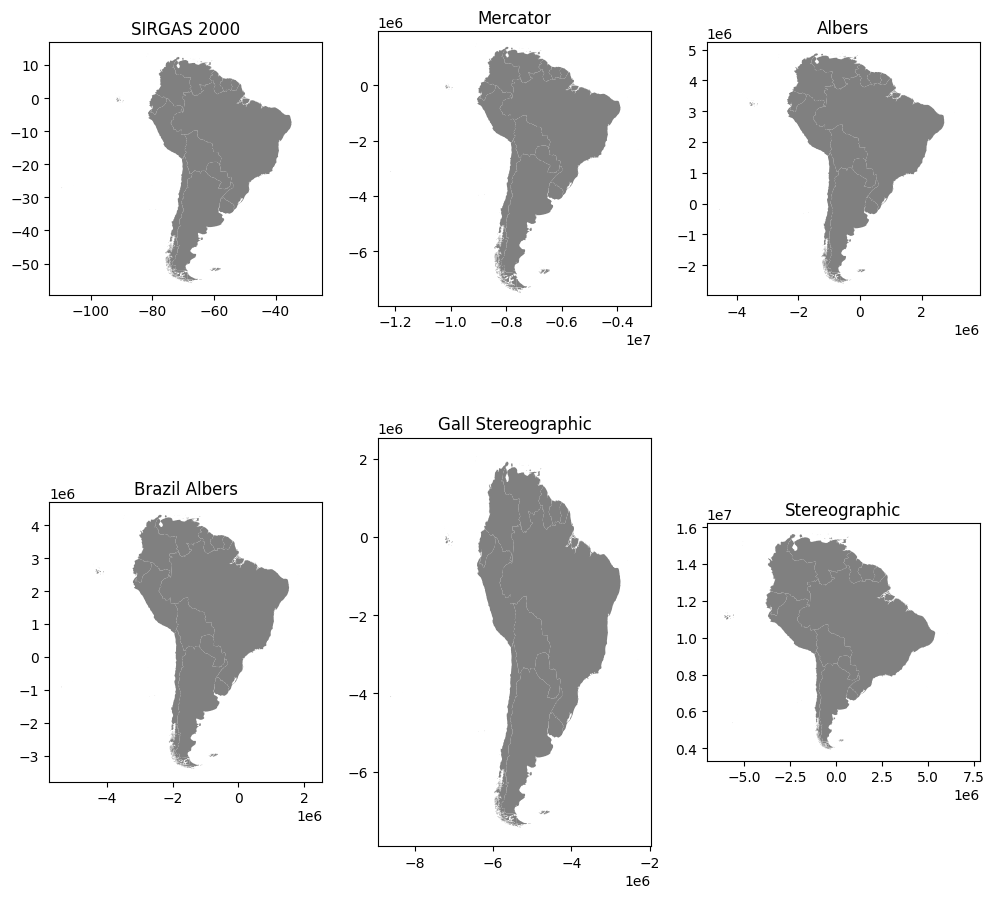

In [89]:
fig, ax = plt.subplots(2, 3, figsize=(10,10))

brasil.plot(ax=ax[0,0], facecolor='gray')
bra_wgs84.plot(ax=ax[0,1], facecolor='gray')
bra_albers.plot(ax=ax[0,2], facecolor='gray')
bra_bralbers.plot(ax=ax[1,0], facecolor='gray')
bra_gall.plot(ax=ax[1,1], facecolor='gray')
bra_stereo.plot(ax=ax[1,2], facecolor='gray')

ax[0,0].set_title('SIRGAS 2000')
ax[0,1].set_title('Mercator')
ax[0,2].set_title('Albers')
ax[1,0].set_title('Brazil Albers')
ax[1,1].set_title('Gall Stereographic')
ax[1,2].set_title('Stereographic')

plt.tight_layout()
plt.show()

In [95]:
# En SIRGAS da error porque necesita ser proyectado
print('Estereogafo: ', bra_stereo[bra_stereo.NAME_SORT == 'Brazil'].area/10**6)
print('Albers: ', bra_albers[bra_albers.NAME_SORT == 'Brazil'].area/10**6)
print('Mercator: ', bra_wgs84[bra_wgs84.NAME_SORT == 'Brazil'].area/10**6)
print('SIRGAS 2000: ', brasil[brasil.NAME_SORT == 'Brazil'].area)
print('Brazil Albers: ', bra_bralbers[bra_bralbers.NAME_SORT == 'Brazil'].area/10**6)
print('Gall Stereographic: ', bra_gall[bra_gall.NAME_SORT == 'Brazil'].area/10**6)

Estereogafo:  2    2.508907e+07
dtype: float64
Albers:  2    8.470775e+06
dtype: float64
Mercator:  2    8.959530e+06
dtype: float64
SIRGAS 2000:  2    706.950022
dtype: float64
Brazil Albers:  2    8.470782e+06
dtype: float64
Gall Stereographic:  2    8.470780e+06
dtype: float64


/var/folders/pc/mkcyyvhd0vggcpltg8x7prb80000gn/T/ipykernel_50269/3040182418.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print('SIRGAS 2000: ', brasil[brasil.NAME_SORT == 'Brazil'].area)


# Automatizacion

In [96]:
dis_sampa.head()

,ds_codigo,ds_nome,sp_codigo,sp_nome,area_km2,geometry
0,51,MANDAQUI,05,SANTANA-TUCURUVI,13.246426,"POLYGON ((330995.449 7407882.882, 330997.253 7..."
1,52,MARSILAC,20,PARELHEIROS,208.184737,"POLYGON ((336169.148 7355348.052, 336166.813 7..."
2,32,MOEMA,12,VILA MARIANA,9.078676,"POLYGON ((331287.247 7392208.050, 331289.654 7..."
3,57,PARQUE DO CARMO,27,ITAQUERA,15.451409,"POLYGON ((352642.665 7390165.168, 352633.278 7..."
4,60,PERDIZES,08,LAPA,6.337240,"POLYGON ((330226.820 7396102.561, 330220.609 7..."


In [97]:
dis_sampa.shape

(96, 6)

In [98]:
agrupado = dis_sampa.groupby('sp_nome')
agrupado

In [99]:
for key, values in agrupado:
    cod_dis = values

cod_dis

,ds_codigo,ds_nome,sp_codigo,sp_nome,area_km2,geometry
29,72,SAO LUCAS,29,VILA PRUDENTE,9.673558,"POLYGON ((340533.881 7391295.876, 340546.130 7..."
42,93,VILA PRUDENTE,29,VILA PRUDENTE,9.583360,"POLYGON ((341776.354 7388505.223, 341768.814 7..."


In [100]:
print(type(cod_dis))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [101]:
print(key)

VILA PRUDENTE


In [115]:
saida = r'output'

In [116]:
outdir = os.path.join(saida, 'Distritos')

In [117]:
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [118]:
for key, values in tqdm(agrupado):
    out = os.path.join(outdir, key.replace(' ', '_') + '.shp')
    #print(out)

    values.to_file(out)

100%|██████████| 32/32 [00:00<00:00, 189.53it/s]


In [119]:
shapefiles = os.listdir(outdir)
len(shapefiles)

160

In [120]:
for shapefile in shapefiles:
    if shapefile.endswith('.shp'):
        data = gpd.read_file(os.path.join(outdir, shapefile))
        data = data.to_crs(epsg=4326)
        #print(data.head())

        data.to_file(os.path.join(outdir, 'repro_' + shapefile))